In [1]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# 650 MeV

In [113]:
my_path = "logging_MD5_2022_11_23_17h15m19s"
with open("logging_MD5/"+my_path+"/"+my_path+".p", 'rb') as f:
    data = pickle.load(f)

gain_list = []
for i in range(len(data[1]["PR.BQL72/Setting"])):
    gain = data[1]["PR.BQL72/Setting"][i]["exAmplitudeH"]
    gain_list.append(gain)
    
timestamp = data[0]

voltage_list = []
for i in range(len(data[1]["BXMWPC_2080/Setting#highVoltageActual"])):
    voltage = data[1]["BXMWPC_2080/Setting#highVoltageActual"][i]
    voltage_list.append(voltage)

d = {'timestamp': timestamp, 'gain': gain_list, 'voltage': voltage_list}
df_650 = pd.DataFrame(data=d)
df_650["energy"] = np.ones(len(df_650), dtype=int)*650

In [114]:
fig, ax = plt.subplots(tight_layout=True, figsize=(20, 5))
ax.plot(df_650.timestamp, df_650.gain)

# 750 MeV

In [115]:
my_path = "logging_EAST3_2022_11_23_13h36m48s"
with open("logging_EAST3/"+my_path+"/"+my_path+".p", 'rb') as f:
    data = pickle.load(f)

gain_list = []
for i in range(len(data[1]["PR.BQL72/Setting"])):
    gain = data[1]["PR.BQL72/Setting"][i]["exAmplitudeH"]
    gain_list.append(gain)
    
timestamp = data[0]

voltage_list = []
for i in range(len(data[1]["BXMWPC_2080/Setting#highVoltageActual"])):
    voltage = data[1]["BXMWPC_2080/Setting#highVoltageActual"][i]
    voltage_list.append(voltage)

for i in range(4): # We fill the missing values
    voltage_list.append(voltage)

d = {'timestamp': timestamp, 'gain': gain_list, 'voltage': voltage_list}
df_750_f1 = pd.DataFrame(data=d)
df_750_f1["energy"] = np.ones(len(df_750_f1), dtype=int)*750

In [116]:
my_path = "logging_EAST3_2022_11_24_09h29m48s"
with open("logging_EAST3/"+my_path+"/"+my_path+".p", 'rb') as f:
    data = pickle.load(f)

gain_list = []
for i in range(len(data[1]["PR.BQL72/Setting"])):
    gain = data[1]["PR.BQL72/Setting"][i]["exAmplitudeH"]
    gain_list.append(gain)
    
timestamp = data[0]

voltage_list = []
for i in range(len(data[1]["BXMWPC_2080/Setting#highVoltageActual"])):
    voltage = data[1]["BXMWPC_2080/Setting#highVoltageActual"][i]
    voltage_list.append(voltage)

In [117]:
d = {'timestamp': timestamp, 'gain': gain_list, 'voltage': voltage_list}
df_750_f2 = pd.DataFrame(data=d)
df_750_f2["energy"] = np.ones(len(df_750_f2), dtype=int)*750

In [118]:
df_750 = pd.concat([df_750_f1,df_750_f2])

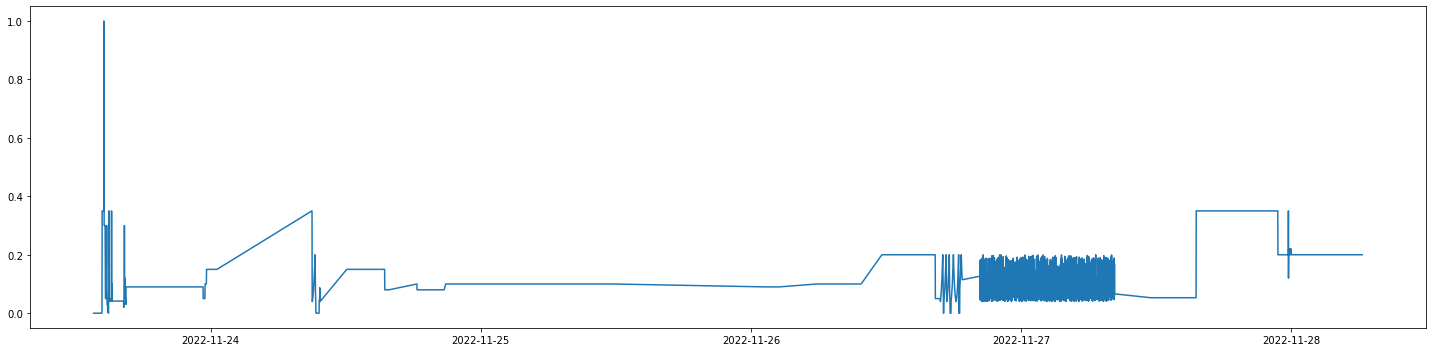

In [119]:
fig, ax = plt.subplots(tight_layout=True, figsize=(20, 5))
ax.plot(df_750.timestamp, df_750.gain)

# 1000 MeV

In [120]:
my_path = "logging_EAST4_2022_11_23_14h00m04s"
with open("logging_EAST4/"+my_path+"/"+my_path+".p", 'rb') as f:
    data = pickle.load(f)

gain_list = []
for i in range(len(data[1]["PR.BQL72/Setting"])):
    gain = data[1]["PR.BQL72/Setting"][i]["exAmplitudeH"]
    gain_list.append(gain)
    
timestamp = data[0][:-1]

voltage_list = []
for i in range(len(data[1]["BXMWPC_2080/Setting#highVoltageActual"])):
    voltage = data[1]["BXMWPC_2080/Setting#highVoltageActual"][i]
    voltage_list.append(voltage)
    
d = {'timestamp': timestamp, 'gain': gain_list, 'voltage': voltage_list}
df_1000 = pd.DataFrame(data=d)
df_1000["energy"] = np.ones(len(df_1000), dtype=int)*1000

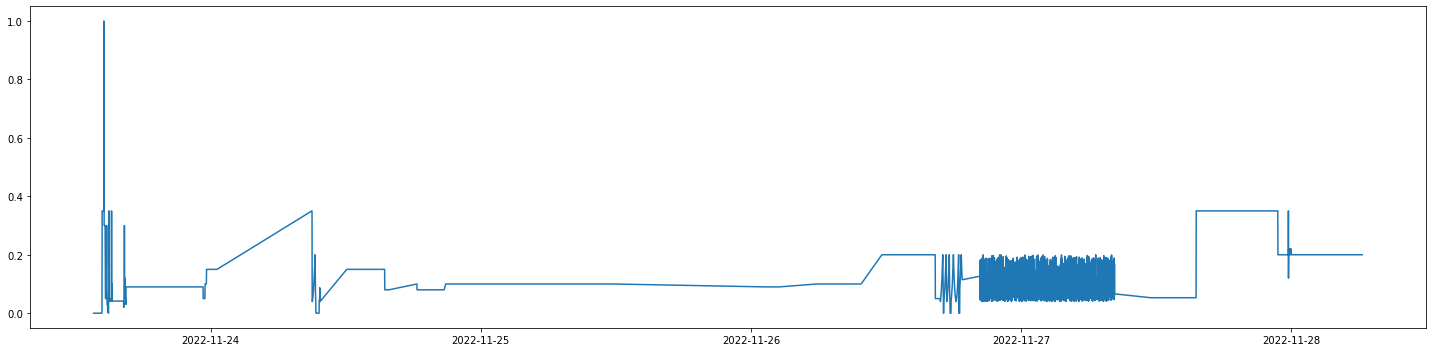

In [121]:
fig, ax = plt.subplots(tight_layout=True, figsize=(20, 5))
ax.plot(df_750.timestamp, df_750.gain)

# Combine all dataframes together

In [122]:
df = pd.concat([df_650, df_750, df_1000])
df.sort_values(by=["timestamp"], inplace=True)

In [127]:
with open('rfko_gain_dataframe.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [125]:
fig, ax = plt.subplots(tight_layout=True, figsize=(25,5))
for energy in df.energy.unique():
    ax.plot(df.timestamp.where(df.energy==energy), df.gain.where(df.energy==energy), label=f"{energy} MeV/u")
ax.legend()
ax.set_xlabel("Local Time")
ax.set_ylabel("Gain RFKO")

Text(0, 0.5, 'Gain RFKO')